In [12]:
import nltk, re, pprint

In [13]:
from nltk import word_tokenize

**Electronic Books**

In [14]:
from urllib import request

In [5]:
url = "http://www.gutenberg.org/files/2554/2554-0.txt"

In [6]:
response = request.urlopen(url)

In [7]:
raw = response.read().decode('utf8')

In [8]:
type(raw)

str

In [9]:
len(raw)

1176967

In [10]:
raw[:75]

'\ufeffThe Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky\r'

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andresdelrio/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
tokens = word_tokenize(raw)

In [16]:
len(tokens)

257727

In [17]:
tokens[:10]

['\ufeffThe',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Crime',
 'and',
 'Punishment',
 ',',
 'by']

In [18]:
text = nltk.Text(tokens)

In [19]:
type(text)

nltk.text.Text

In [20]:
text[1024:1062]

['an',
 'exceptionally',
 'hot',
 'evening',
 'early',
 'in',
 'July',
 'a',
 'young',
 'man',
 'came',
 'out',
 'of',
 'the',
 'garret',
 'in',
 'which',
 'he',
 'lodged',
 'in',
 'S.',
 'Place',
 'and',
 'walked',
 'slowly',
 ',',
 'as',
 'though',
 'in',
 'hesitation',
 ',',
 'towards',
 'K.',
 'bridge',
 '.',
 'He',
 'had',
 'successfully']

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andresdelrio/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
# text.collocations() ## this didnt work out so i googled the alternative below
print('; '.join(text.collocation_list()))

Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna; great deal; young man; Nikodim Fomitch; Ilya Petrovitch; Project Gutenberg; Andrey Semyonovitch; Hay Market; Dmitri Prokofitch; Good heavens


In [27]:
raw.find("PART I")

5336

In [29]:
raw.rfind("End of Project Gutenberg")

1157812

In [30]:
raw = raw[5336:1157812]

In [31]:
raw.find("PART I")

0

**Dealing with HTML**

In [32]:
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"

In [33]:
html = request.urlopen(url).read().decode('utf8')

In [34]:
html[:60]

'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN'

In [36]:
#print(html)

In [15]:
from bs4 import BeautifulSoup

In [38]:
raw = BeautifulSoup(html, 'html.parser').get_text()

In [39]:
tokens = word_tokenize(raw)

In [41]:
#tokens

In [49]:
tokens = tokens[120:400]

In [50]:
text = nltk.Text(tokens)

In [51]:
text.concordance('gene')

Displaying 5 of 5 matches:
hey say too few people now carry the gene for blondes to last beyond the next 
blonde hair is caused by a recessive gene . In order for a child to have blond
 have blonde hair , it must have the gene on both sides of the family in the g
ere is a disadvantage of having that gene or by chance . They do n't disappear
des would disappear is if having the gene was a disadvantage and I do not thin


**Processing RSS Feeds**

In [53]:
pip install feedparser

     |████████████████████████████████| 81kB 2.5MB/s eta 0:00:01
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-cp37-none-any.whl size=6066 sha256=7d950557fe2ffeee6360c85cbbec46c3560633f3821ba4c77d4addf2640d82fd
  Stored in directory: /Users/andresdelrio/Library/Caches/pip/wheels/f1/80/5a/444ba08a550cdd241bd9baf8bae44be750efe370adb944506a
Successfully built sgmllib3k
Note: you may need to restart the kernel to use updated packages.


In [54]:
import feedparser

In [55]:
llog = feedparser.parse("http://languagelog.ldc.upenn.edu/nll/?feed=atom")

In [56]:
llog['feed']['title']

'Language Log'

In [57]:
len(llog.entries)

13

In [58]:
post = llog.entries[2]

In [59]:
post.title

'(Not?) Including myself'

In [60]:
content = post.content[0].value

In [61]:
content[:70]

'<p>Jonah Markowitz, "<a href="https://www.nytimes.com/2021/03/29/nyreg'

In [62]:
raw = BeautifulSoup(content, 'html.parser').get_text()

In [64]:
#word_tokenize(raw)

In [66]:
bbcnews = feedparser.parse("http://www.bbc.co.uk/mundo/ultimas_noticias/index.xml")

In [67]:
bbcnews['feed']['title']

'BBCMundo.com | Última Hora'

In [70]:
postbbc = bbcnews.entries[0]

In [74]:
postbbc.title

'EE.UU.: Obama destaca ayuda de países árabes contra Estado Islámico'

In [93]:
content_link = postbbc.links[0].href
content_link

'http://www.bbc.co.uk/mundo/ultimas_noticias/2014/09/140923_ultnot_eeuu_obama_ataques_siria_tsb.shtml'

In [95]:
htmlbbcpost = request.urlopen(content_link).read().decode('utf8')

**Reading Local Files**

In [7]:
f = open('document.txt')

In [2]:
print(f.read())

This is an example
Of how to read files
From local sources


In [3]:
import os

In [4]:
os.listdir('.')

['pos_tagged_oz.py',
 'nlp_bagofwords.py',
 'document.txt',
 'sentiment_prediction_naive_bayes_class.py',
 'Sudoku.ipynb',
 'text_prediction_markov_chain.py',
 'plagiarism_classifier.py',
 'nlp_language_parsing.py',
 'nlp_language_parsing',
 'nlp_tf_idf.py',
 'Processing Raw Text.ipynb',
 'utils.py',
 'edit_distance.py',
 'part_of_speech.py',
 'textprocessing.py',
 '.ipynb_checkpoints',
 'graph.txt',
 'text_preprocessing_oprah.py',
 'script.py',
 'nlp_chunk_counter.py',
 'nlp_ngrams.py']

In [8]:
f.read()

'This is an example\nOf how to read files\nFrom local sources'

In [6]:
f.close()

In [10]:
file = open('document.txt')
for line in file:
    print(line.strip())

This is an example
Of how to read files
From local sources


In [18]:
path = nltk.data.find('corpora/gutenberg/melville-moby_dick.txt')

In [19]:
raw = open(path, 'rU').read()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


In [31]:
#print(raw)

**Extracting Text from PDF, MSWord and other Binary Formats**

ASCII text and HTML text are human readable formats. Text often comes in binary formats — like PDF and MSWord — that can only be opened using specialized software. Third-party libraries such as pypdf and pywin32 provide access to these formats. Extracting text from multi-column documents is particularly challenging. For once-off conversion of a few documents, it is simpler to open the document with a suitable application, then save it as text to your local drive, and access it as described below. If the document is already on the web, you can enter its URL in Google's search box. The search result often includes a link to an HTML version of the document, which you can save as text.

**Capturing User input**

In [23]:
s = input('Enter some text:')

Enter some text:This is an example


In [24]:
print("You typed", len(word_tokenize(s)), "words.")

You typed 4 words.


**The NLP Pipeline**

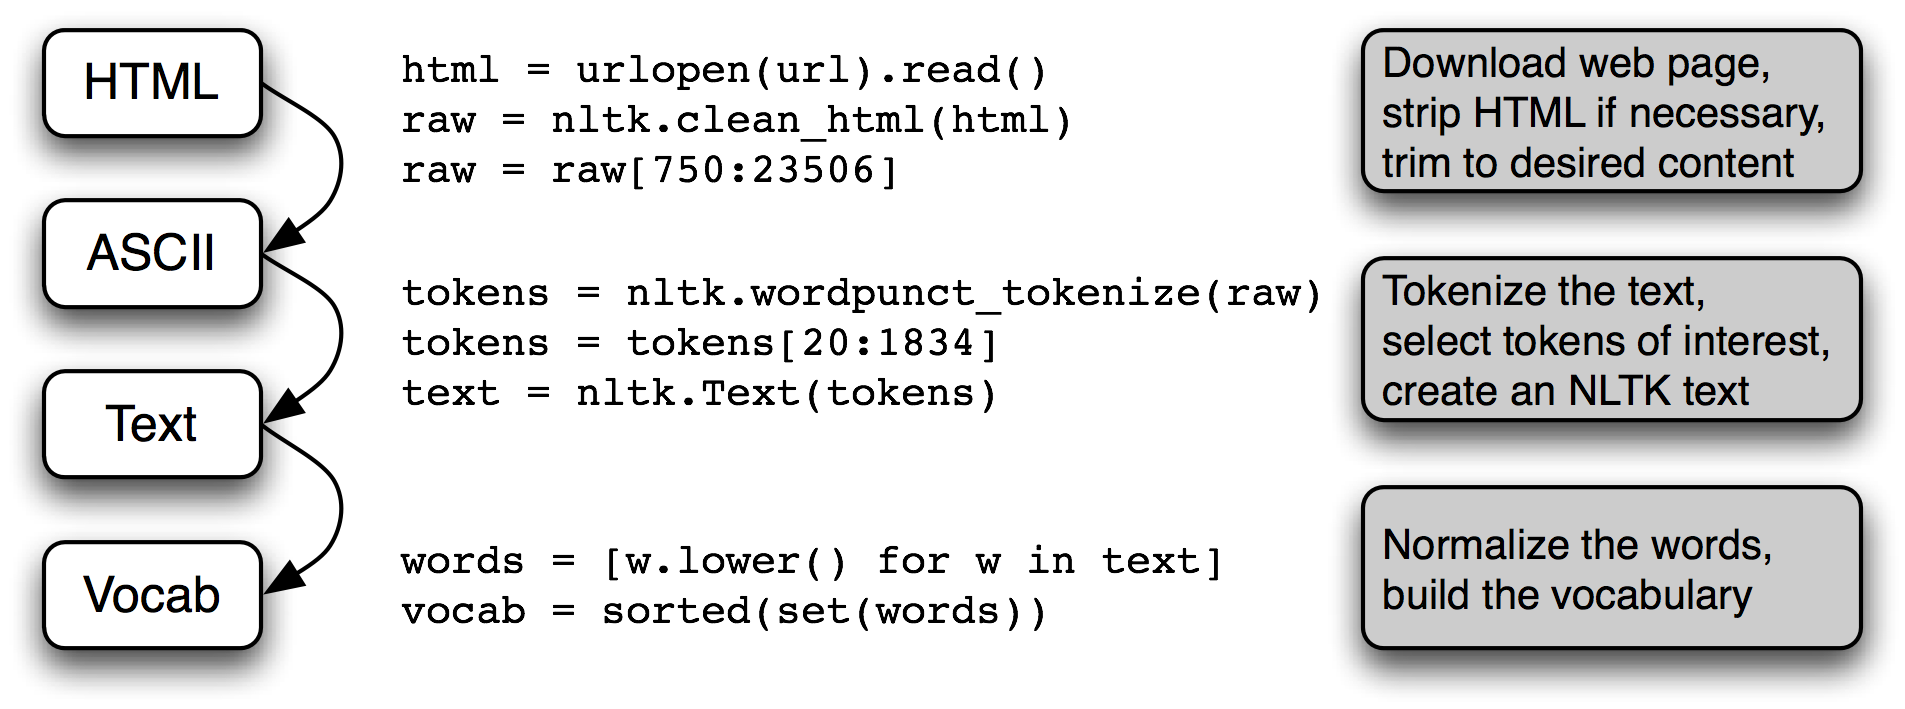

In [25]:
sent = "love is love"

In [27]:
len(sent.split())

3

**Text Processing with Unicode**

Unicode

Unicode supports over a million characters. Each character is assigned a number, called a code point. In Python, code points are written in the form \uXXXX, where XXXX is the number in 4-digit hexadecimal form.

Within a program, we can manipulate Unicode strings just like normal strings. However, when Unicode characters are stored in files or displayed on a terminal, they must be encoded as a stream of bytes. Some encodings (such as ASCII and Latin-2) use a single byte per code point, so they can only support a small subset of Unicode, enough for a single language. Other encodings (such as UTF-8) use multiple bytes and can represent the full range of Unicode characters.

Text in files will be in a particular encoding, so we need some mechanism for translating it into Unicode — translation into Unicode is called decoding. Conversely, to write out Unicode to a file or a terminal, we first need to translate it into a suitable encoding — this translation out of Unicode is called encoding, and is illustrated in 3.3.

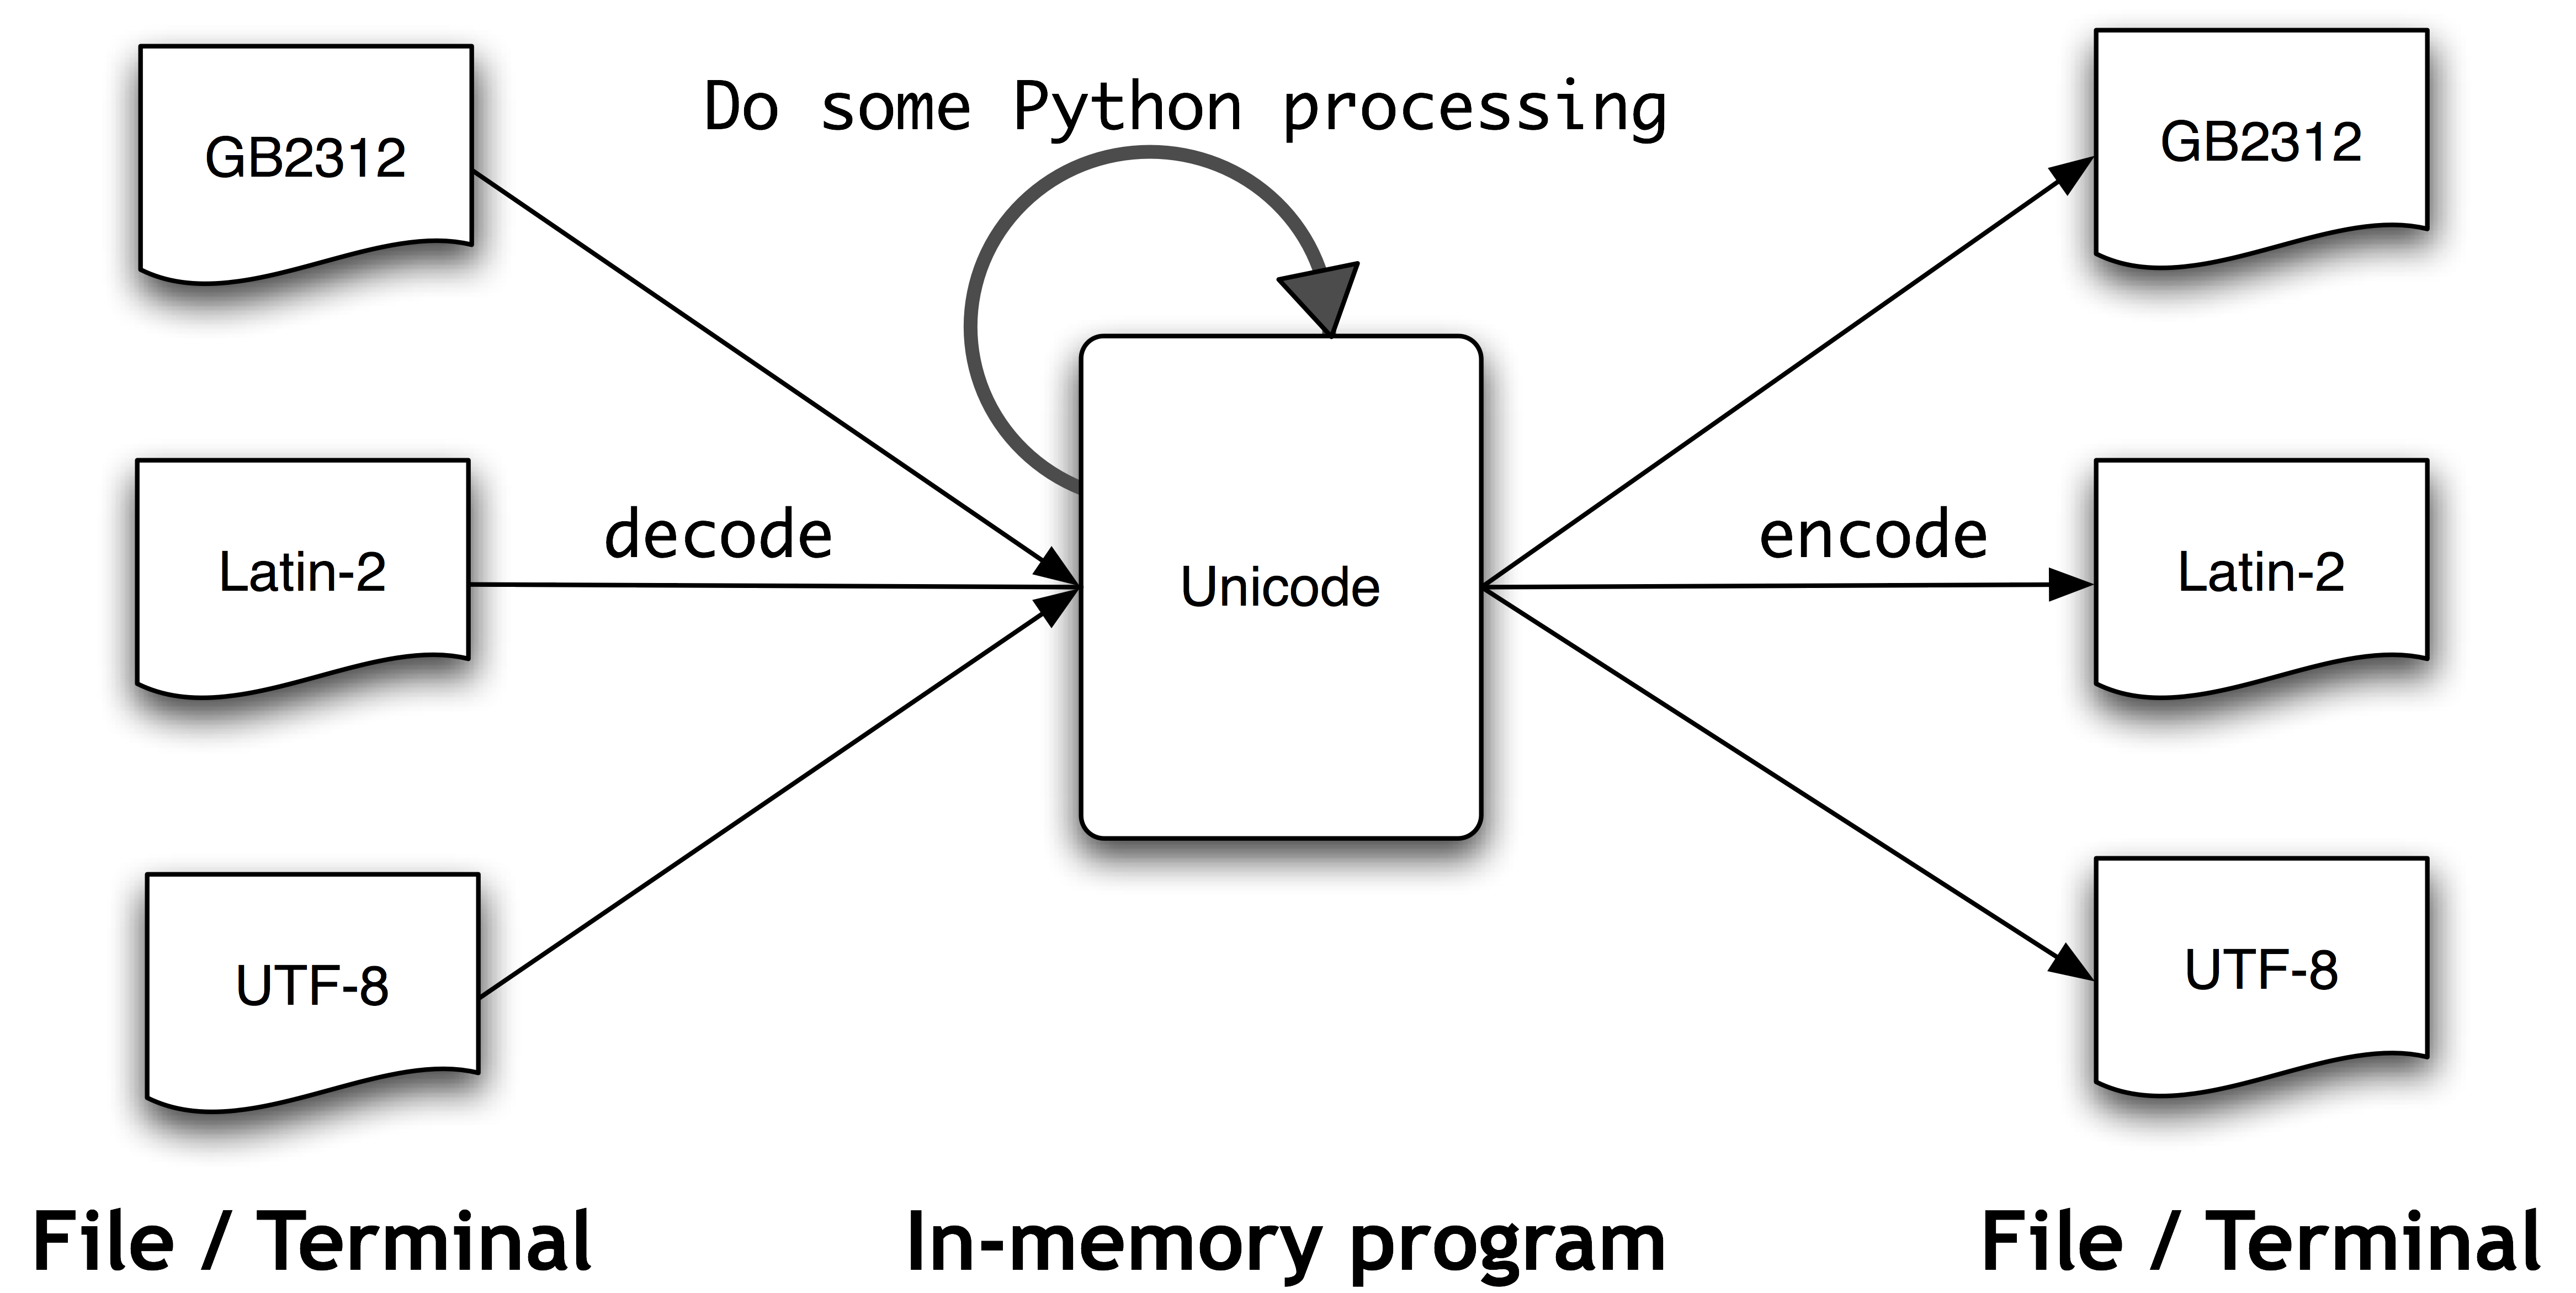